In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')


Mounted at /content/gdrive/


In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

In [43]:
path = "/content/gdrive/MyDrive/Colab Notebooks/data_balanced.csv"
df = pd.read_csv (path)

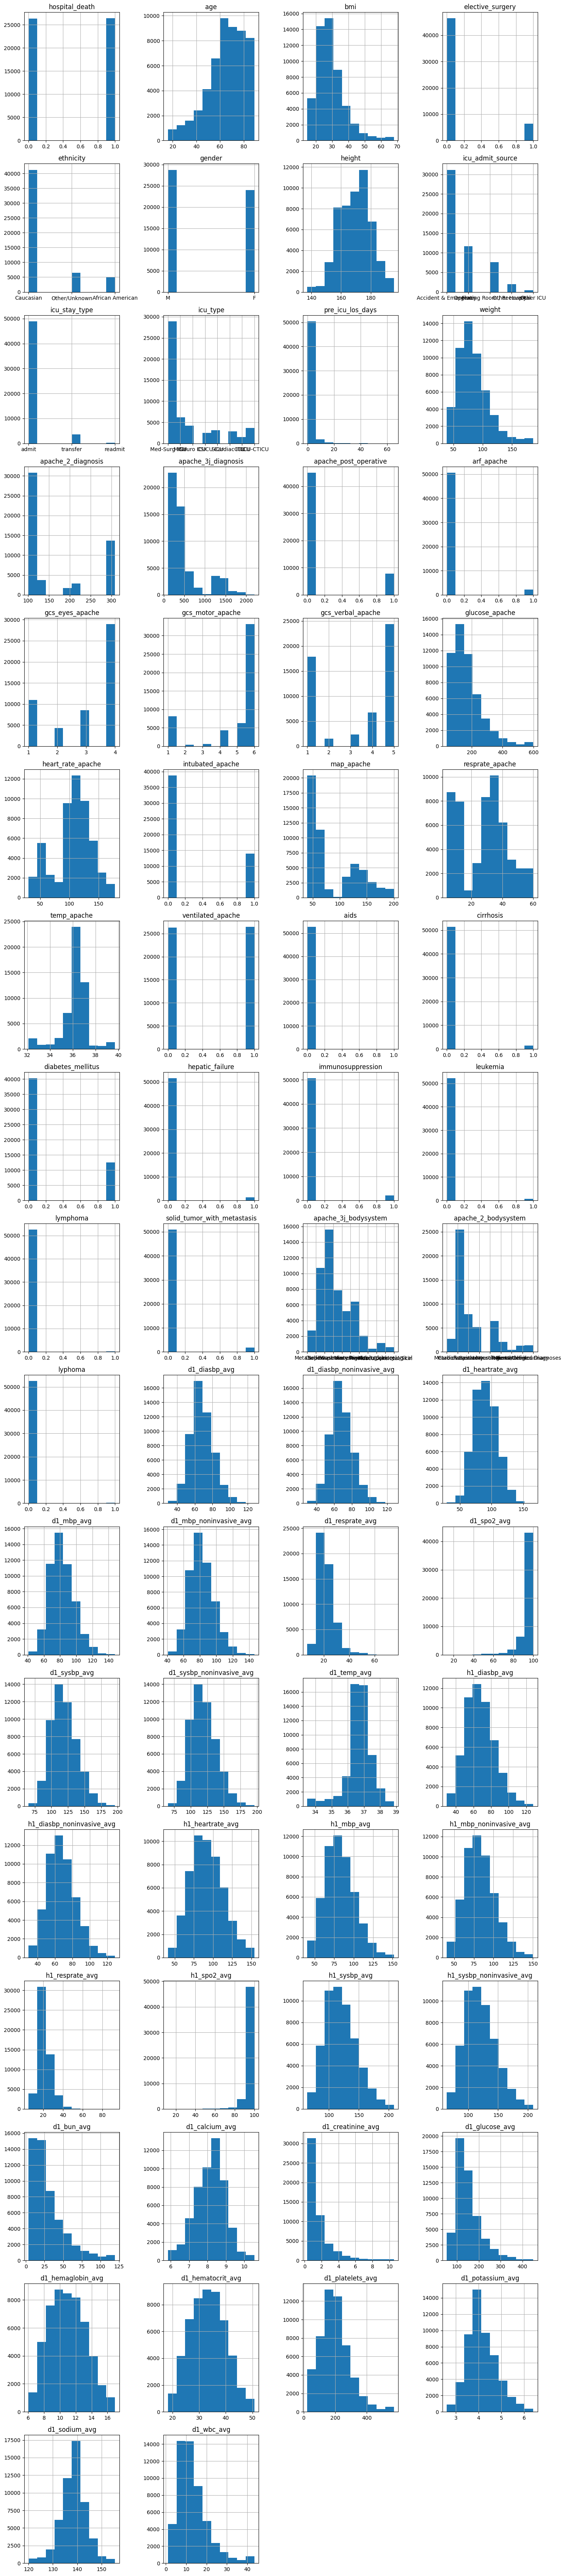

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

num_rows = (len(df.columns) + 3) // 4

fig, axes = plt.subplots(num_rows, 4, figsize=(15, 4*num_rows))


axes = axes.flatten()


for i, column in enumerate(df.columns):
    df[column].hist(ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('')


for i in range(len(df.columns), num_rows*4):
    fig.delaxes(axes[i])


plt.tight_layout()


plt.show()


In [13]:
df.columns

Index(['hospital_death', 'age', 'bmi', 'elective_surgery', 'ethnicity',
       'gender', 'height', 'icu_admit_source', 'icu_stay_type', 'icu_type',
       'pre_icu_los_days', 'weight', 'apache_2_diagnosis',
       'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache',
       'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache',
       'glucose_apache', 'heart_rate_apache', 'intubated_apache', 'map_apache',
       'resprate_apache', 'temp_apache', 'ventilated_apache', 'd1_diasbp_max',
       'd1_diasbp_min', 'd1_diasbp_noninvasive_max',
       'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min',
       'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max',
       'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min',
       'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min',
       'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max',
       'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min',
       'h1_diasbp_noninvasive_max'

In [44]:
y= df.iloc[:, 0]
X = df.iloc[:, 1:]

In [17]:
pd.options.display.max_rows = 1000
X.dtypes

age                              int64
bmi                            float64
elective_surgery                 int64
ethnicity                       object
gender                          object
height                         float64
icu_admit_source                object
icu_stay_type                   object
icu_type                        object
pre_icu_los_days               float64
weight                         float64
apache_2_diagnosis               int64
apache_3j_diagnosis            float64
apache_post_operative            int64
arf_apache                       int64
gcs_eyes_apache                  int64
gcs_motor_apache                 int64
gcs_verbal_apache                int64
glucose_apache                 float64
heart_rate_apache                int64
intubated_apache                 int64
map_apache                       int64
resprate_apache                float64
temp_apache                    float64
ventilated_apache                int64
d1_diasbp_max            

In [45]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns


numerical_data = df[numerical_columns]


scaler = StandardScaler()


scaled_numerical_data = scaler.fit_transform(numerical_data)


scaled_numerical_df = pd.DataFrame(scaled_numerical_data, columns=numerical_columns)




categorical_data = df[categorical_columns]
encoder = OneHotEncoder()
encoded_categorical_data = encoder.fit_transform(categorical_data)
encoded_categorical_df = pd.DataFrame(encoded_categorical_data.toarray(), columns=encoder.get_feature_names_out(categorical_columns))

scaled_encoded_df = pd.concat([scaled_numerical_df, encoded_categorical_df], axis=1)


In [46]:
scaled_encoded_df

,hospital_death,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,...,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses
0,-1.000341,-0.008642,0.305008,-0.371236,1.233086,-0.341983,0.865749,1.642496,0.483521,-0.415095,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-1.000341,-0.827952,0.783513,-0.371236,-0.651511,-0.353872,0.427530,-0.593167,0.481071,-0.415095,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-1.000341,-0.071666,-0.100186,-0.371236,-0.428481,-0.279108,-0.264190,-0.701929,0.005318,-0.415095,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.000341,0.117406,1.831080,-0.371236,0.287071,-0.068303,1.936562,-0.738183,-0.929887,-0.415095,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.000341,-2.655644,-0.756403,-0.371236,0.240606,-0.332152,-0.646761,-0.593167,0.481071,-0.415095,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52751,0.999659,0.684620,1.506392,-0.371236,0.993330,0.105691,2.050561,1.642496,0.476337,-0.415095,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
52752,0.999659,0.936716,-0.480336,-0.371236,-1.599385,-0.349528,-0.994553,-0.605252,-0.230320,-0.415095,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
52753,0.999659,0.117406,0.921746,-0.371236,-1.835424,0.285401,-0.020735,-0.762352,-0.696698,-0.415095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
52754,0.999659,1.062764,0.741406,-0.371236,0.965451,-0.356845,1.208131,-0.605252,-0.211453,-0.415095,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
from sklearn.decomposition import PCA


n_components = 20
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_encoded_df)

principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components+1)])


explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

import numpy as np
np.random.seed(42)
cluster_labels = np.random.randint(0, 3, len(scaled_encoded_df))


principal_df['Cluster'] = cluster_labels

print(principal_df.head())





Explained Variance Ratio: [0.15723638 0.07772304 0.04935941 0.04530748 0.04249874 0.03703019
 0.03324281 0.02780228 0.02405314 0.02384258 0.02285591 0.02197239
 0.02017211 0.01961555 0.01874532 0.01688005 0.01635072 0.0157992
 0.01523455 0.01474992]
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  2.456618  1.149046  0.696015 -2.486117  0.853298 -1.890837  2.510472   
1 -2.273888 -0.534799 -0.469099 -1.552767 -0.845047  0.782986 -1.125373   
2 -3.216545  1.597879  2.702528 -1.301697 -1.895823 -1.807728  1.232410   
3 -2.753061 -2.525592  0.129258  0.827796  2.118075 -0.592542  1.019957   
4 -1.298339 -0.992677 -1.060883 -2.789787 -0.886395 -1.050457 -0.699192   

        PC8       PC9      PC10  ...      PC12      PC13      PC14      PC15  \
0 -1.993434  0.608556 -1.955323  ...  0.989164  0.314037 -1.906573 -1.418120   
1  0.385852 -0.872269 -0.677582  ...  0.427663 -0.534072  2.053389  0.437883   
2  3.965453 -0.926660 -0.931219  ...  0.078916  0.384746 -0

In [47]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')


cluster_labels = cluster.fit_predict(principal_df.iloc[:, :-1])

scaled_encoded_df.reset_index(drop=True, inplace=True)
result_df = pd.concat([scaled_encoded_df, pd.Series(cluster_labels, name='Predicted_Cluster')], axis=1)


result_df['Target'] = y


print(result_df.head())

   hospital_death       age       bmi  elective_surgery    height  \
0       -1.000341 -0.008642  0.305008         -0.371236  1.233086   
1       -1.000341 -0.827952  0.783513         -0.371236 -0.651511   
2       -1.000341 -0.071666 -0.100186         -0.371236 -0.428481   
3       -1.000341  0.117406  1.831080         -0.371236  0.287071   
4       -1.000341 -2.655644 -0.756403         -0.371236  0.240606   

   pre_icu_los_days    weight  apache_2_diagnosis  apache_3j_diagnosis  \
0         -0.341983  0.865749            1.642496             0.483521   
1         -0.353872  0.427530           -0.593167             0.481071   
2         -0.279108 -0.264190           -0.701929             0.005318   
3         -0.068303  1.936562           -0.738183            -0.929887   
4         -0.332152 -0.646761           -0.593167             0.481071   

   apache_post_operative  ...  apache_2_bodysystem_Gastrointestinal  \
0              -0.415095  ...                                   0.0  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

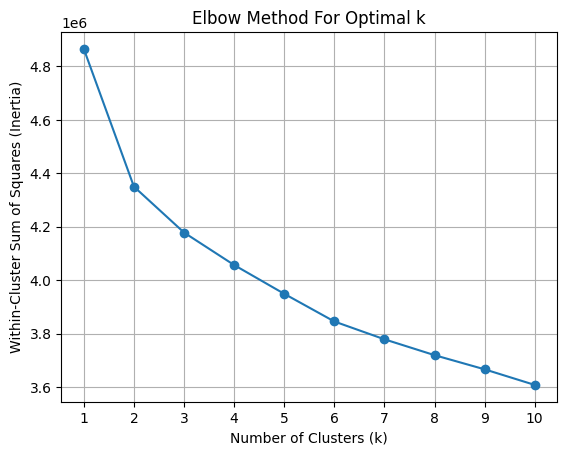

In [12]:

from sklearn.cluster import KMeans
inertia = []
for k in range(1, 11):  # Trying values of 'k' from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_encoded_df)
    inertia.append(kmeans.inertia_)


plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [6]:

from sklearn.cluster import MiniBatchKMeans

n_clusters = 2
batch_size = 100  # Number of data points in each mini-batch
max_iter = 100    # Maximum number of iterations
tolerance = 0.01  # Tolerance to declare convergence
mbkmeans = MiniBatchKMeans(n_clusters=n_clusters, batch_size=batch_size, max_iter=max_iter, tol=tolerance)


cluster_labels = mbkmeans.fit_predict(scaled_encoded_df)


scaled_encoded_df['Cluster'] = cluster_labels


print(scaled_encoded_df.head())


result_df = pd.concat([scaled_encoded_df, y], axis=1)


print(result_df.head())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   hospital_death       age       bmi  elective_surgery    height  \
0       -1.000341 -0.008642  0.305008         -0.371236  1.233086   
1       -1.000341 -0.827952  0.783513         -0.371236 -0.651511   
2       -1.000341 -0.071666 -0.100186         -0.371236 -0.428481   
3       -1.000341  0.117406  1.831080         -0.371236  0.287071   
4       -1.000341 -2.655644 -0.756403         -0.371236  0.240606   

   pre_icu_los_days    weight  apache_2_diagnosis  apache_3j_diagnosis  \
0         -0.341983  0.865749            1.642496             0.483521   
1         -0.353872  0.427530           -0.593167             0.481071   
2         -0.279108 -0.264190           -0.701929             0.005318   
3         -0.068303  1.936562           -0.738183            -0.929887   
4         -0.332152 -0.646761           -0.593167             0.481071   

   apache_post_operative  ...  apache_2_bodysystem_Cardiovascular  \
0              -0.415095  ...                                 0.0   
1 

In [9]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import MiniBatchKMeans

silhouette_avg = silhouette_score(scaled_encoded_df, cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.06996259700634881


In [55]:
####################################################


# Use average
import pandas as pd


max_columns = [col for col in df.columns if '_max' in col]
min_columns = [col for col in df.columns if '_min' in col]


for col_max in max_columns:
    col_name = col_max.replace('_max', '_avg')
    col_min = col_max.replace('_max', '_min')
    df[col_name] = (df[col_max] + df[col_min]) / 2.0


df.drop(max_columns + min_columns, axis=1, inplace=True)


print(df.head())


   hospital_death  age        bmi  elective_surgery  ethnicity gender  height  \
0               0   65  31.735596                 0  Caucasian      M  182.88   
1               0   52  35.856447                 0  Caucasian      F  162.60   
2               0   64  28.246097                 0  Caucasian      F  165.00   
3               0   67  44.878021                 0  Caucasian      M  172.70   
4               0   23  22.594800                 0  Caucasian      M  172.20   

       icu_admit_source icu_stay_type      icu_type  ...  d1_bun_avg  \
0  Accident & Emergency         admit  Med-Surg ICU  ...        30.0   
1  Accident & Emergency      transfer  Med-Surg ICU  ...        16.5   
2  Accident & Emergency      transfer          MICU  ...         9.0   
3                 Floor         admit  Med-Surg ICU  ...        42.0   
4  Accident & Emergency         admit     Neuro ICU  ...        12.0   

   d1_calcium_avg  d1_creatinine_avg  d1_glucose_avg  d1_hemaglobin_avg  \
0    

In [56]:
df.columns

Index(['hospital_death', 'age', 'bmi', 'elective_surgery', 'ethnicity',
       'gender', 'height', 'icu_admit_source', 'icu_stay_type', 'icu_type',
       'pre_icu_los_days', 'weight', 'apache_2_diagnosis',
       'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache',
       'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache',
       'glucose_apache', 'heart_rate_apache', 'intubated_apache', 'map_apache',
       'resprate_apache', 'temp_apache', 'ventilated_apache', 'aids',
       'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
       'apache_2_bodysystem', 'lyphoma', 'd1_diasbp_avg',
       'd1_diasbp_noninvasive_avg', 'd1_heartrate_avg', 'd1_mbp_avg',
       'd1_mbp_noninvasive_avg', 'd1_resprate_avg', 'd1_spo2_avg',
       'd1_sysbp_avg', 'd1_sysbp_noninvasive_avg', 'd1_temp_avg',
       'h1_diasbp_avg', 'h1_diasbp_noninvasive_avg', 'h1_heartrate_avg',

In [58]:
#decrease sample size

desired_sample_size = 1000


class_distribution = df['hospital_death'].value_counts()
print("Original Class Distribution:")
print(class_distribution)


random_sample = df.groupby('hospital_death', group_keys=False).apply(lambda x: x.sample(desired_sample_size))


sampled_class_distribution = random_sample['hospital_death'].value_counts()
print("Class Distribution After Sampling:")
print(sampled_class_distribution)

Original Class Distribution:
1    26387
0    26369
Name: hospital_death, dtype: int64
Class Distribution After Sampling:
0    1000
1    1000
Name: hospital_death, dtype: int64


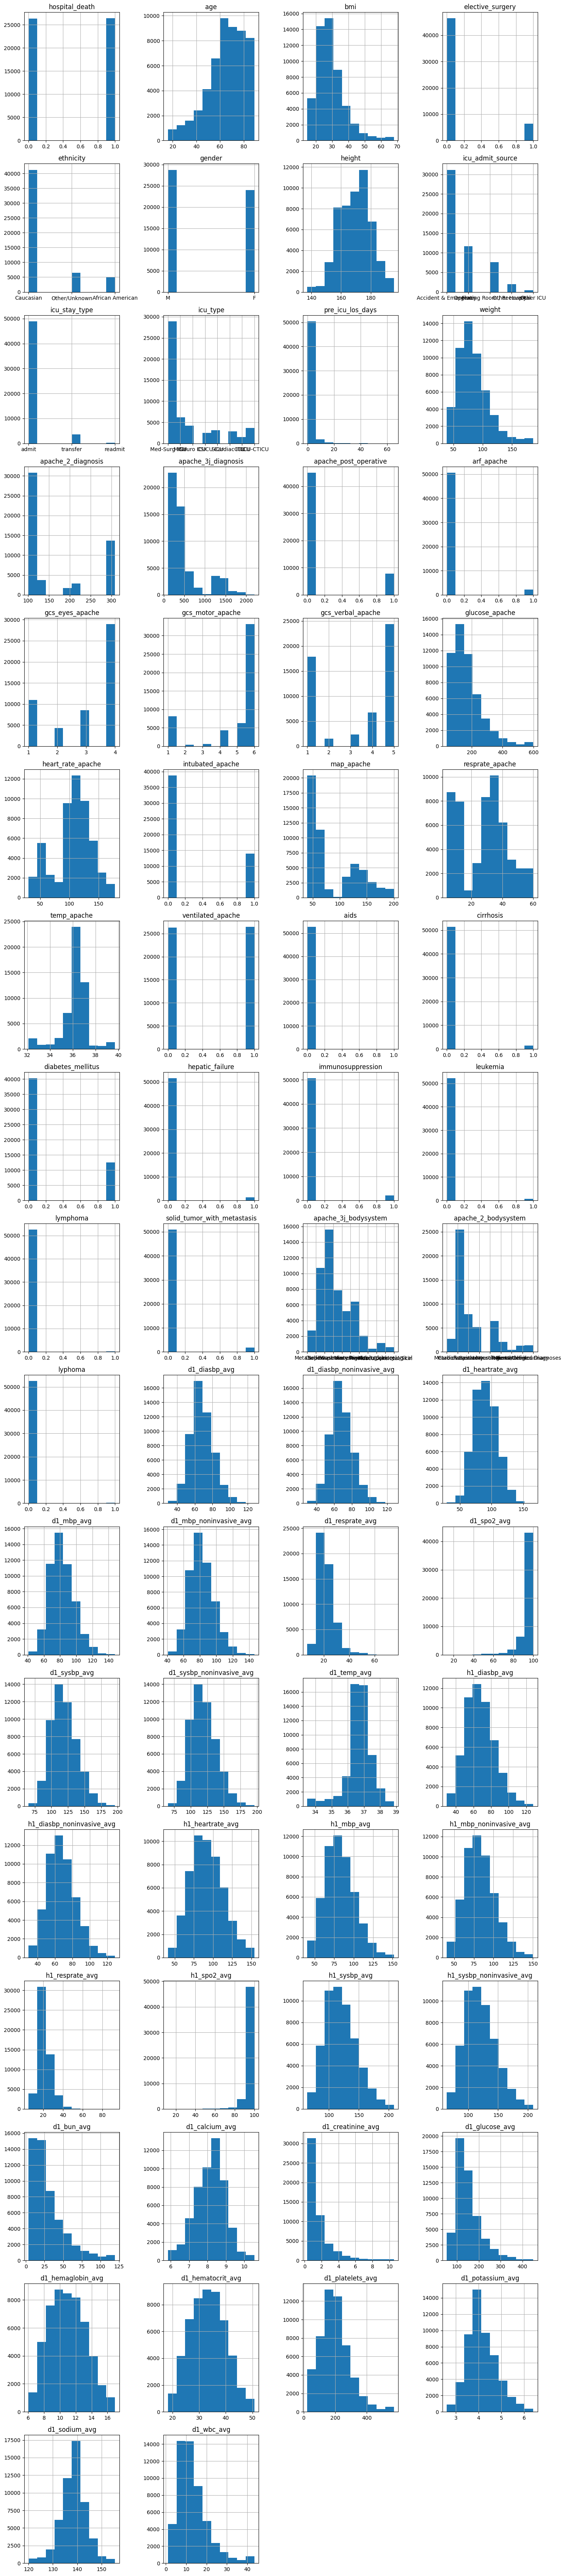

In [24]:
#check distribution is same
import pandas as pd
import matplotlib.pyplot as plt




num_rows = (len(random_sample.columns) + 3) // 4  # Round up to the nearest integer


fig, axes = plt.subplots(num_rows, 4, figsize=(15, 4*num_rows))


axes = axes.flatten()


for i, column in enumerate(df.columns):
    df[column].hist(ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('')


for i in range(len(df.columns), num_rows*4):
    fig.delaxes(axes[i])

plt.tight_layout()


plt.show()

In [59]:
random_sample

,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_stay_type,icu_type,...,d1_bun_avg,d1_calcium_avg,d1_creatinine_avg,d1_glucose_avg,d1_hemaglobin_avg,d1_hematocrit_avg,d1_platelets_avg,d1_potassium_avg,d1_sodium_avg,d1_wbc_avg
17607,0,79,31.770478,0,Caucasian,F,165.1,Accident & Emergency,admit,Med-Surg ICU,...,61.0,9.30,3.075,251.0,9.40,28.70,268.0,3.80,134.5,24.300
20202,0,54,32.466181,0,Caucasian,F,155.0,Accident & Emergency,transfer,CCU-CTICU,...,12.0,8.65,0.575,87.0,13.65,43.35,286.5,3.95,140.0,11.950
22704,0,80,26.722873,0,Caucasian,M,163.0,Accident & Emergency,admit,Med-Surg ICU,...,14.0,8.30,1.040,175.5,11.50,34.50,62.0,4.10,139.0,6.300
23316,0,67,30.033099,0,Caucasian,M,170.2,Accident & Emergency,admit,CCU-CTICU,...,17.5,9.60,0.750,129.0,13.80,41.30,326.0,4.30,139.5,15.600
23307,0,61,30.175733,0,Caucasian,M,172.7,Floor,admit,Med-Surg ICU,...,24.0,8.00,0.760,158.5,14.00,44.10,165.0,4.20,141.0,8.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45640,1,84,22.522494,0,Caucasian,M,177.8,Accident & Emergency,transfer,MICU,...,30.0,7.80,1.300,147.0,11.70,38.30,137.0,5.50,143.0,7.300
38152,1,69,44.886824,0,Caucasian,M,177.8,Accident & Emergency,admit,Med-Surg ICU,...,28.5,8.50,1.100,130.0,10.25,33.55,152.5,3.85,144.0,7.000
48593,1,68,23.374726,0,Caucasian,M,185.0,Accident & Emergency,admit,Cardiac ICU,...,21.5,7.20,1.395,317.5,13.10,38.50,146.0,3.65,141.0,25.200
26792,1,71,21.819350,0,Caucasian,M,185.4,Floor,admit,MICU,...,43.5,8.55,4.270,122.0,11.05,35.05,228.5,5.10,137.5,8.765


In [60]:
#divide target and predictors
y= random_sample.iloc[:, 0]
X = random_sample.iloc[:, 1:]

In [63]:
y

17607    0
20202    0
22704    0
23316    0
23307    0
        ..
45640    1
38152    1
48593    1
26792    1
27143    1
Name: hospital_death, Length: 2000, dtype: int64

In [64]:
distinct_counts_df = y.value_counts().reset_index()
distinct_counts_df.columns = ['Value', 'Count']

print(distinct_counts_df)

   Value  Count
0      0   1000
1      1   1000


In [69]:
#scale predictors
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns


numerical_data = X[numerical_columns]


scaler = StandardScaler()


scaled_numerical_data = scaler.fit_transform(numerical_data)


scaled_numerical_df = pd.DataFrame(scaled_numerical_data, columns=numerical_columns)




categorical_data = X[categorical_columns]
encoder = OneHotEncoder()
encoded_categorical_data = encoder.fit_transform(categorical_data)
encoded_categorical_df = pd.DataFrame(encoded_categorical_data.toarray(), columns=encoder.get_feature_names_out(categorical_columns))

scaled_encoded_df = pd.concat([scaled_numerical_df, encoded_categorical_df], axis=1)

In [66]:
scaled_encoded_df

,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,...,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses
0,0.848840,0.328367,-0.361362,-0.446361,-0.300555,0.120444,-0.703129,0.034913,-0.408486,-0.193247,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.702233,0.409945,-0.361362,-1.393943,-0.363996,-0.218011,-0.715228,-0.897671,-0.408486,-0.193247,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.910883,-0.263516,-0.361362,-0.643383,-0.328936,-0.493498,-0.715228,-0.897671,-0.408486,-0.193247,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.104325,0.124642,-0.361362,0.032121,-0.364473,0.136186,-0.654731,-0.900032,-0.408486,-0.193247,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.267932,0.141367,-0.361362,0.266671,0.356505,0.254252,-0.787824,-0.649769,-0.408486,-0.193247,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.159054,-0.756053,-0.361362,0.745153,-0.285530,-0.485627,-0.787824,-0.649745,-0.408486,-0.193247,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1996,0.228411,1.866392,-0.361362,0.745153,-0.366619,2.296789,-0.739427,-0.904754,-0.408486,-0.193247,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.166368,-0.656120,-0.361362,1.420656,-0.329175,-0.139301,-0.691029,-0.909476,-0.408486,-0.193247,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.352497,-0.838504,-0.361362,1.458184,3.746986,-0.336077,-0.763625,-0.671017,-0.408486,5.174725,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [70]:
#run H clustering
from sklearn.cluster import AgglomerativeClustering

n_clusters = 2

cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='complete')

cluster_labels = cluster.fit_predict(scaled_encoded_df)

scaled_encoded_df['Cluster'] = cluster_labels


print(scaled_encoded_df.head())

result_df = pd.concat([scaled_encoded_df, y], axis=1)


print(result_df.head())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


        age       bmi  elective_surgery    height  pre_icu_los_days    weight  \
0  0.848840  0.328367         -0.361362 -0.446361         -0.300555  0.120444   
1 -0.702233  0.409945         -0.361362 -1.393943         -0.363996 -0.218011   
2  0.910883 -0.263516         -0.361362 -0.643383         -0.328936 -0.493498   
3  0.104325  0.124642         -0.361362  0.032121         -0.364473  0.136186   
4 -0.267932  0.141367         -0.361362  0.266671          0.356505  0.254252   

   apache_2_diagnosis  apache_3j_diagnosis  apache_post_operative  arf_apache  \
0           -0.703129             0.034913              -0.408486   -0.193247   
1           -0.715228            -0.897671              -0.408486   -0.193247   
2           -0.715228            -0.897671              -0.408486   -0.193247   
3           -0.654731            -0.900032              -0.408486   -0.193247   
4           -0.787824            -0.649769              -0.408486   -0.193247   

   ...  apache_2_bodysyste

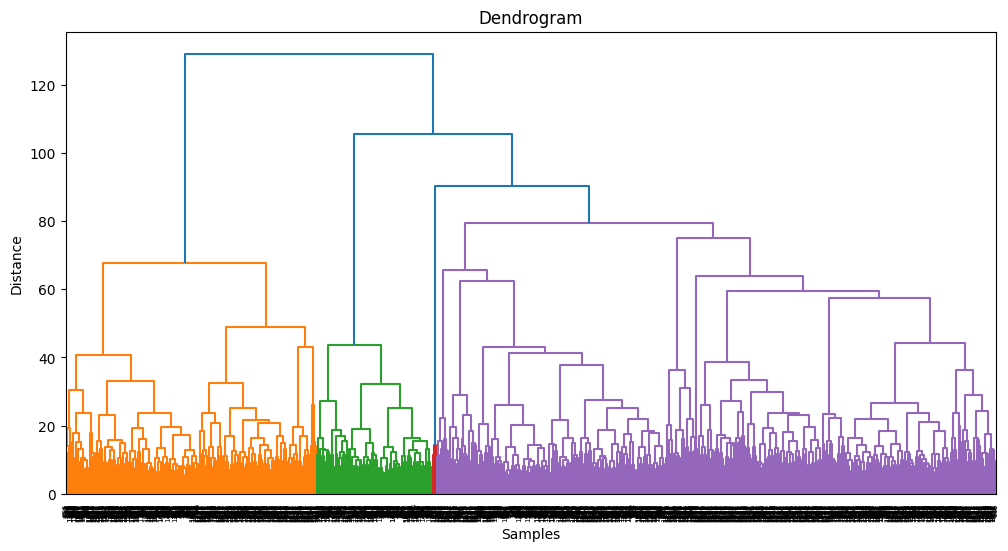

In [19]:
# dendrogram

import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt


Z = linkage(scaled_encoded_df, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


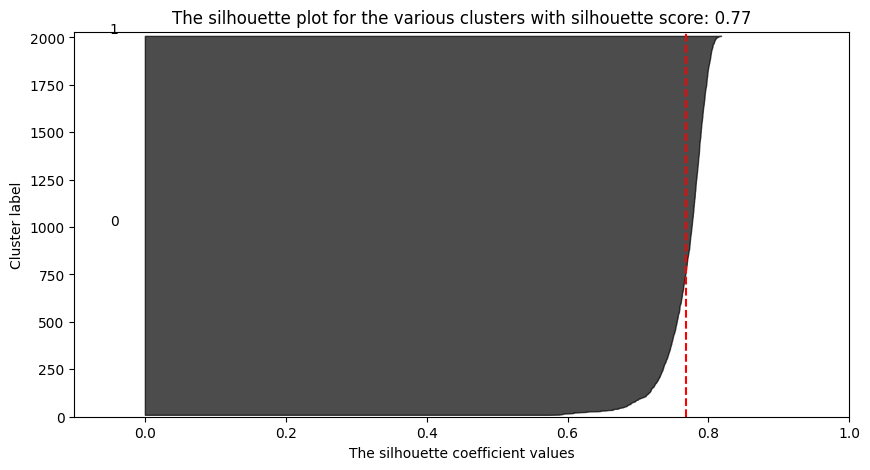

In [72]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score


sample_silhouette_values = silhouette_samples(scaled_encoded_df, cluster_labels)


plt.figure(figsize=(10, 5))

plt.xlim([-0.1, 1])


plt.ylim([0, len(scaled_encoded_df) + (n_clusters + 1) * 10])

y_lower = 10
for i in range(n_clusters):

    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )


    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))


    y_lower = y_upper + 10

plt.xlabel("The silhouette coefficient values")
plt.ylabel("Cluster label")

silhouette_avg = silhouette_score(scaled_encoded_df, cluster_labels)
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.title(
    "The silhouette plot for the various clusters with silhouette score: {:.2f}".format(
        silhouette_avg
    )
)
plt.show()


In [46]:
from sklearn.metrics import silhouette_score

silhouette_score_value = silhouette_score(scaled_encoded_df, cluster_labels)
print("Silhouette Score:", silhouette_score_value)


Silhouette Score: 0.2436261163221536


In [73]:
# rerun result
from sklearn.metrics import silhouette_score

silhouette_score_value = silhouette_score(scaled_encoded_df, cluster_labels)
print("Silhouette Score:", silhouette_score_value)


Silhouette Score: 0.7676346125089722


In [20]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = 2
cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
cluster_labels = cluster.fit_predict(scaled_encoded_df)


overall_cluster_center = scaled_encoded_df.mean()
wcss = ((scaled_encoded_df - overall_cluster_center) ** 2).sum().sum()


cluster_centers = []
for cluster_id in range(n_clusters):
    cluster_data = scaled_encoded_df[cluster_labels == cluster_id]
    cluster_center = cluster_data.mean()
    cluster_centers.append(cluster_center)


bcss = 0
for cluster_id in range(n_clusters):
    cluster_center = cluster_centers[cluster_id]
    bcss += ((cluster_center - overall_cluster_center) ** 2).sum().sum()


tss = wcss + bcss


bcss_tss_ratio = bcss / tss

print("Between-Cluster Sum of Squares (BCSS):", bcss)
print("Total Sum of Squares (TSS):", tss)
print("BCSS / TSS ratio:", bcss_tss_ratio)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Between-Cluster Sum of Squares (BCSS): 12.7947856043068
Total Sum of Squares (TSS): 123580.82328560429
BCSS / TSS ratio: 0.00010353374628956077


In [21]:
from sklearn.decomposition import PCA

n_components = 20
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_encoded_df)


principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components+1)])


explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

explained_variance_sum = np.sum(explained_variance_ratio)

print("Sum of Explained Variance Ratio:", explained_variance_sum)




Explained Variance Ratio: [0.15823149 0.06882116 0.06247732 0.04904522 0.04174387 0.03897366
 0.03475965 0.03273416 0.02902717 0.0269317  0.0260053  0.02365695
 0.02256108 0.02194796 0.02042147 0.01960655 0.01865287 0.01670507
 0.01637335 0.01553532]
Sum of Explained Variance Ratio: 0.7442113084775326


Explained Variance Ratio: [0.15823149 0.06882116 0.06247732 0.04904528 0.04174381 0.03897393
 0.03475988 0.03273486 0.0290263  0.02693144 0.02600519 0.02365658
 0.02255282 0.02202587 0.02042744 0.01960453 0.01865692 0.0166642
 0.01628875 0.0156978 ]


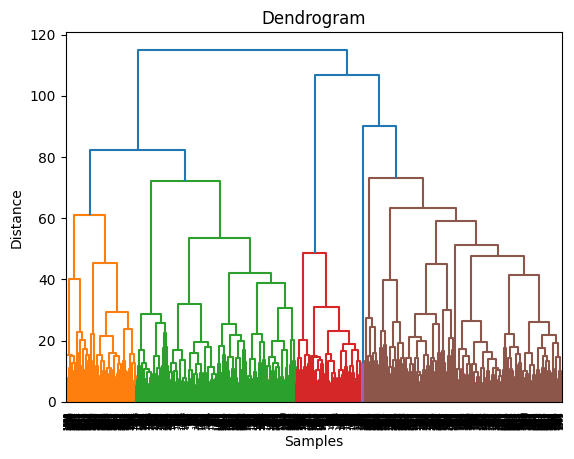

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.468445  2.128861  0.672878  0.880882 -1.815444  0.582822 -0.713207   
1 -1.721784 -0.581835 -0.450198 -0.610348  0.116789 -3.743056  2.355403   
2  3.198616 -0.272591 -2.339929 -0.068786 -2.033158 -0.939993 -0.383334   
3 -1.405348 -1.212087 -1.433587 -1.936040 -1.905206  0.581877 -0.554424   
4 -1.610863 -4.945934  1.789170  0.786833 -1.633310  1.138690  2.074730   

        PC8       PC9      PC10  ...      PC12      PC13      PC14      PC15  \
0 -0.272668 -0.273534 -0.770958  ... -0.225100 -1.029855  1.041149 -0.912183   
1  0.201418 -2.636232 -0.152842  ... -1.397793 -0.382940  1.148989 -0.344155   
2  0.039207  1.588596 -0.117599  ...  1.772600 -0.743264  0.194892  0.202914   
3  0.638963  0.661968  0.494777  ...  0.290294 -0.297775 -1.274177 -0.365443   
4  0.247529  1.312411 -0.022002  ...  0.000011  1.435735  0.198702  0.396591   

       PC16      PC17      PC18      PC19      PC20  Cluster  
0  1.

In [25]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch


n_components = 20
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_encoded_df)


principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components + 1)])

explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)


n_clusters = 2
hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')
cluster_labels = hierarchical_clustering.fit_predict(principal_df)


principal_df['Cluster'] = cluster_labels


dendrogram = sch.dendrogram(sch.linkage(principal_df.iloc[:, :-1], method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


print(principal_df.head())


In [60]:
from sklearn.metrics import silhouette_score


silhouette_score_value = silhouette_score(principal_components, cluster_labels)
print("Silhouette Score:", silhouette_score_value)

Silhouette Score: 0.10929183019463495


In [24]:
# rerun result with PC
from sklearn.metrics import silhouette_score


silhouette_score_value = silhouette_score(principal_components, cluster_labels)
print("Silhouette Score:", silhouette_score_value)

Silhouette Score: 0.6096292041952729


In [26]:
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components+1)])


explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

explained_variance_sum = np.sum(explained_variance_ratio)

print("Sum of Explained Variance Ratio:", explained_variance_sum)

Explained Variance Ratio: [0.15823149 0.06882116 0.06247732 0.04904528 0.04174381 0.03897393
 0.03475988 0.03273486 0.0290263  0.02693144 0.02600519 0.02365658
 0.02255282 0.02202587 0.02042744 0.01960453 0.01865692 0.0166642
 0.01628875 0.0156978 ]
Sum of Explained Variance Ratio: 0.7443255535293177


In [ ]:
#SVM

In [28]:
path = "/content/gdrive/MyDrive/Colab Notebooks/data_balanced.csv"
df = pd.read_csv (path)

In [29]:
#divide target and predictors
y= df.iloc[:, 0]
X = df.iloc[:, 1:]

In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# scale numerical
numerical_data = X[numerical_columns]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical data
scaled_numerical_data = scaler.fit_transform(numerical_data)

# Create a new DataFrame with scaled numerical data
Scaled_X = pd.DataFrame(scaled_numerical_data, columns=numerical_columns)


In [31]:
Scaled_X

,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,...,d1_wbc_min,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,lyphoma
0,-0.008642,0.305008,-0.371236,1.233086,-0.341983,0.865749,1.642496,0.483521,-0.415095,-0.204112,...,1.814916,-0.03201,-0.163832,-0.557733,-0.156295,-0.204917,-0.107527,-0.074217,-0.19154,-0.074217
1,-0.827952,0.783513,-0.371236,-0.651511,-0.353872,0.427530,-0.593167,0.481071,-0.415095,-0.204112,...,0.058526,-0.03201,-0.163832,-0.557733,-0.156295,-0.204917,-0.107527,-0.074217,-0.19154,-0.074217
2,-0.071666,-0.100186,-0.371236,-0.428481,-0.279108,-0.264190,-0.701929,0.005318,-0.415095,-0.204112,...,0.902147,-0.03201,-0.163832,-0.557733,-0.156295,-0.204917,-0.107527,-0.074217,-0.19154,-0.074217
3,0.117406,1.831080,-0.371236,0.287071,-0.068303,1.936562,-0.738183,-0.929887,-0.415095,-0.204112,...,-0.162751,-0.03201,-0.163832,1.792972,-0.156295,-0.204917,-0.107527,-0.074217,-0.19154,-0.074217
4,-2.655644,-0.756403,-0.371236,0.240606,-0.332152,-0.646761,-0.593167,0.481071,-0.415095,-0.204112,...,0.293633,-0.03201,-0.163832,-0.557733,-0.156295,-0.204917,-0.107527,-0.074217,-0.19154,-0.074217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52751,0.684620,1.506392,-0.371236,0.993330,0.105691,2.050561,1.642496,0.476337,-0.415095,-0.204112,...,-1.213820,-0.03201,-0.163832,-0.557733,-0.156295,-0.204917,-0.107527,-0.074217,-0.19154,-0.074217
52752,0.936716,-0.480336,-0.371236,-1.599385,-0.349528,-0.994553,-0.605252,-0.230320,-0.415095,-0.204112,...,0.344804,-0.03201,-0.163832,-0.557733,-0.156295,-0.204917,-0.107527,-0.074217,-0.19154,-0.074217
52753,0.117406,0.921746,-0.371236,-1.835424,0.285401,-0.020735,-0.762352,-0.696698,-0.415095,4.899270,...,2.119173,-0.03201,-0.163832,1.792972,-0.156295,-0.204917,-0.107527,-0.074217,-0.19154,-0.074217
52754,1.062764,0.741406,-0.371236,0.965451,-0.356845,1.208131,-0.605252,-0.211453,-0.415095,-0.204112,...,-0.879137,-0.03201,-0.163832,-0.557733,-0.156295,-0.204917,-0.107527,-0.074217,-0.19154,-0.074217


In [32]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(Scaled_X, y, test_size=0.3,random_state=109) # 70% training and 30% test


In [33]:
#Import svm model
from sklearn import svm


clf = svm.SVC(kernel='rbf', gamma=0.034) # Linear Kernel


clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [71]:
#linear kernel
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7819548872180451


In [73]:
#rbf, gamma 0.068
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9824982624628799


In [75]:
#rbf, gamma 0.034
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.952296708156947


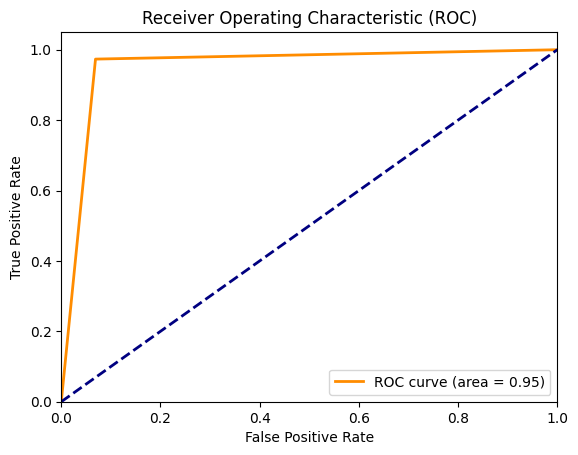

In [78]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()